In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [43]:
# Laden der Daten aus der CSV-Datei 'emails2.csv' in einen DataFrame 'df'
df = pd.read_csv("../emails2.csv")

# Nimmt alle Spalten außer der ersten und der letzten (Email No. & Prediction) aus dem DataFrame und speichert ihre Werte in X
X = df[df.columns[1:-1]].values

# Nimmt die letzte Spalte aus dem DataFrame und speichert ihre Werte in y
y = df[df.columns[-1]].values

# Erstellen eines neuen DataFrame 'X_df' mit den Feature-Daten (alle Spalten außer der ersten und letzten)  
X_df = df[df.columns[1:-1]]

In [44]:
# Dimensionalität des DataFrame ausgeben
print(df.shape)
print()

# Die ersten 10 Zeilen ausgeben
print(df.head(10))

# Die letzten 10 Zeilen ausgeben
print(df.tail(10))

(5572, 6779)

  Email No.  go  jurong  point  crazi  avail  bugi  n  great  world  ...  \
0   Email 1   1       1      1      1      1     1  1      1      1  ...   
1   Email 2   0       0      0      0      0     0  0      0      0  ...   
2   Email 3   0       0      0      0      0     0  0      0      0  ...   
3   Email 4   0       0      0      0      0     0  0      0      0  ...   
4   Email 5   0       0      0      0      0     0  0      0      0  ...   
5   Email 6   0       0      0      0      0     0  0      0      0  ...   
6   Email 7   0       0      0      0      0     0  0      0      0  ...   
7   Email 8   0       0      0      0      0     0  0      0      0  ...   
8   Email 9   0       0      0      0      0     0  0      0      0  ...   
9  Email 10   0       0      0      0      0     0  0      0      0  ...   

   pshewmiss  accent  dental  nmde  dump  heap  salesman  piti  soani  \
0          0       0       0     0     0     0         0     0      0   
1  

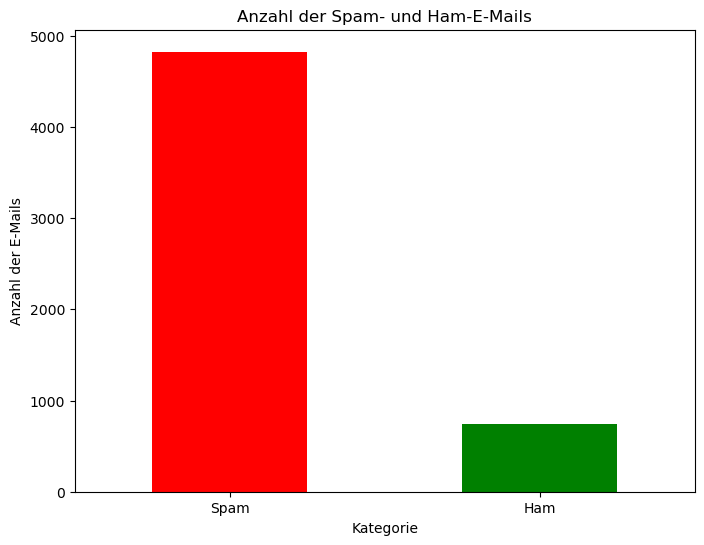

In [45]:
# Zählen, wie viele E-Mails als Spam und wie viele als Ham klassifiziert sind
spam_ham_counts = df['Prediction'].value_counts()

# Erstellen eines Balkendiagramms
plt.figure(figsize=(8, 6))
spam_ham_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Anzahl der Spam- und Ham-E-Mails')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl der E-Mails')
plt.xticks(ticks=[0, 1], labels=['Spam', 'Ham'], rotation=0)
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_16076\3969654336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["transformed_text"] = X_df.apply(lambda row: " ".join(


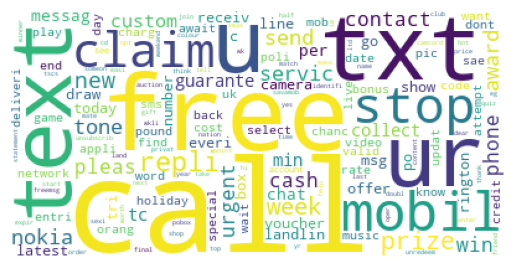

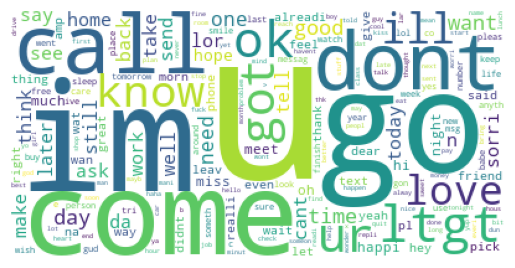

In [46]:
# Hinzufügen einer neuen Spalte 'transformed_text' zum DataFrame 'X_df', die für jede Zeile alle verwendeten Woerter enthält
# Dieser Text wird erzeugt, indem für jede Spalte die Anzahl der Vorkommen des Spaltennamens entsprechend dem Wert in dieser Zeile wiederholt wird
X_df["transformed_text"] = X_df.apply(lambda row: " ".join(
    sum([[col] * row[col] for col in X_df.columns], [])), axis=1)
# Übertragen der 'transformed_text' Spalte vom DataFrame 'X_df' zum ursprünglichen DataFrame 'df'
df['transformed_text'] = X_df['transformed_text']

# Erstellen einer Wortwolke für die Zeilen in 'df', wo die Vorhersage ('Prediction') 1 (Spam) ist.
# Die Wortwolke wird mit einem weißen Hintergrund und ohne Wortkombinationen ('collocations') generiert
# Der generierte Text wird aus der Verkettung ('str.cat') der 'transformed_text' Spaltenwerte zusammengesetzt
wordcloud = WordCloud(background_color='white', collocations=False).generate(
    df[df['Prediction'] == 1]['transformed_text'].str.cat(sep=" "))

# Anzeigen der Wortwolke
# Deaktivieren der Achsenbeschriftungen
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Erstellen einer Wortwolke für die Zeilen in 'df', wo die Vorhersage ('Prediction') 0 (Ham) ist.
# Die Wortwolke wird mit einem weißen Hintergrund und ohne Wortkombinationen ('collocations') generiert
# Der generierte Text wird aus der Verkettung ('str.cat') der 'transformed_text' Spaltenwerte zusammengesetzt
wordcloud = WordCloud(background_color='white', collocations=False).generate(
    df[df['Prediction'] == 0]['transformed_text'].str.cat(sep=" "))

# Anzeigen der Wortwolke
# Deaktivieren der Achsenbeschriftungen
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_16076\2911712360.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spam_word_counts = df[df['Prediction'] == 1].drop('Prediction', axis=1).sum(axis=1)
C:\Users\steve\AppData\Local\Temp\ipykernel_16076\2911712360.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ham_word_counts = df[df['Prediction'] == 0].drop('Prediction', axis=1).sum(axis=1)


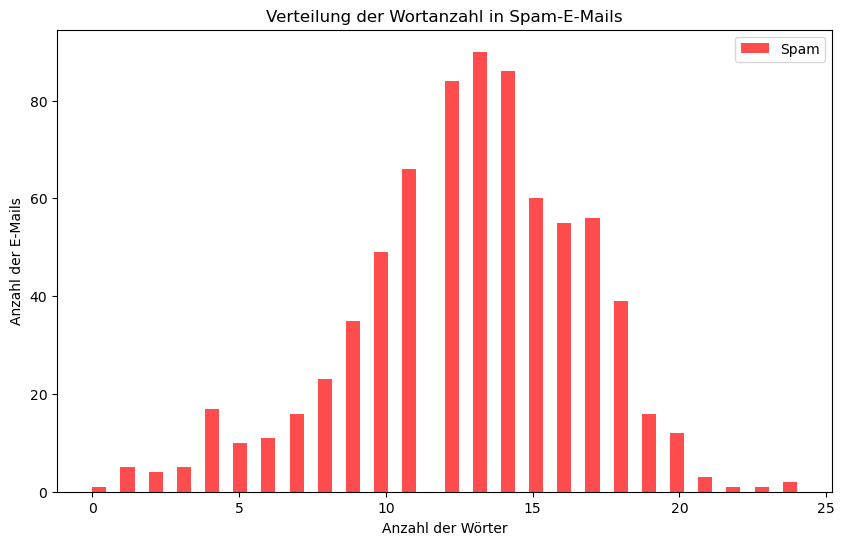

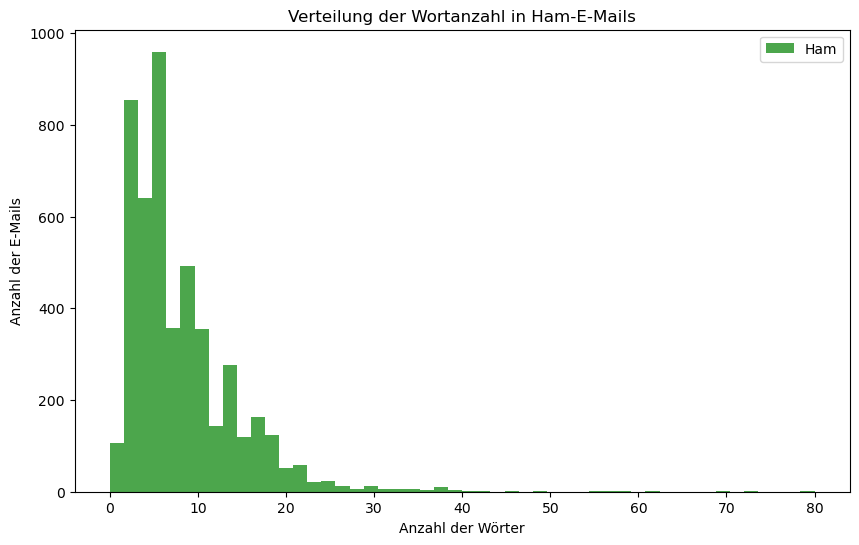

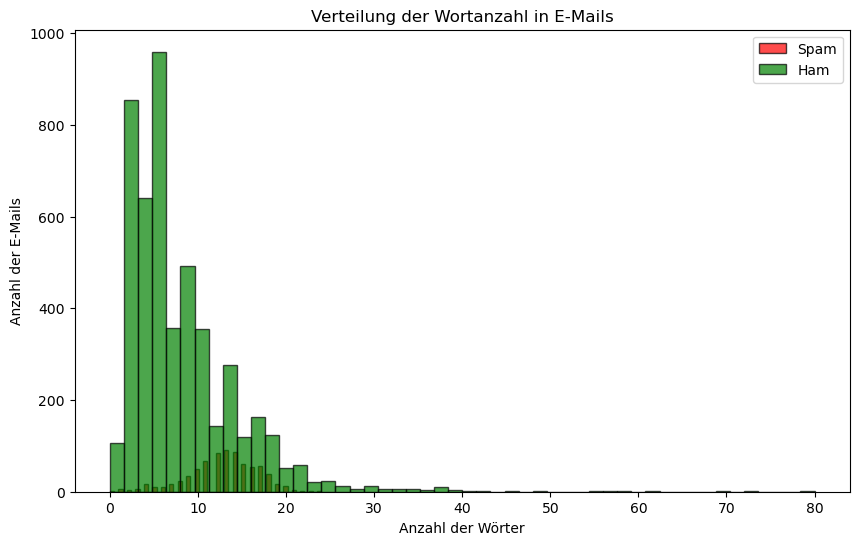

Durchschnittliche Wortanzahl in Spam-E-Mails: 12.79
Standardabweichung der Wortanzahl in Spam-E-Mails: 3.90
Durchschnittliche Wortanzahl in Ham-E-Mails: 8.06
Standardabweichung der Wortanzahl in Ham-E-Mails: 6.30


In [47]:
# Berechnen der Gesamtanzahl der Wörter in jeder E-Mail für Spam und Ham
spam_word_counts = df[df['Prediction'] == 1].drop('Prediction', axis=1).sum(axis=1)
ham_word_counts = df[df['Prediction'] == 0].drop('Prediction', axis=1).sum(axis=1)

# Erstellen eines Plots für Spam-E-Mails
plt.figure(figsize=(10, 6))
plt.hist(spam_word_counts, bins=50, color='red', alpha=0.7, label='Spam')
plt.title('Verteilung der Wortanzahl in Spam-E-Mails')
plt.xlabel('Anzahl der Wörter')
plt.ylabel('Anzahl der E-Mails')
plt.legend()
plt.show()

# Erstellen eines Plots für Ham-E-Mails
plt.figure(figsize=(10, 6))
plt.hist(ham_word_counts, bins=50, color='green', alpha=0.7, label='Ham')
plt.title('Verteilung der Wortanzahl in Ham-E-Mails')
plt.xlabel('Anzahl der Wörter')
plt.ylabel('Anzahl der E-Mails')
plt.legend()
plt.show()

# Erstellen eines kombinierten Plots für Spam- und Ham-E-Mails
plt.figure(figsize=(10, 6))
plt.hist(spam_word_counts, bins=50, color='red', alpha=0.7, label='Spam', edgecolor='black')
plt.hist(ham_word_counts, bins=50, color='green', alpha=0.7, label='Ham', edgecolor='black')
plt.title('Verteilung der Wortanzahl in E-Mails')
plt.xlabel('Anzahl der Wörter')
plt.ylabel('Anzahl der E-Mails')
plt.legend()
plt.show()

# Berechnen des Durchschnitts und der Standardabweichung für Spam-E-Mails
spam_durchschnitt = spam_word_counts.mean()
spam_standardabweichung = spam_word_counts.std()

# Berechnen des Durchschnitts und der Standardabweichung für Ham-E-Mails
ham_durchschnitt = ham_word_counts.mean()
ham_standardabweichung = ham_word_counts.std()

# Ausgeben der Ergebnisse
print(f"Durchschnittliche Wortanzahl in Spam-E-Mails: {spam_durchschnitt:.2f}")
print(f"Standardabweichung der Wortanzahl in Spam-E-Mails: {spam_standardabweichung:.2f}")

print(f"Durchschnittliche Wortanzahl in Ham-E-Mails: {ham_durchschnitt:.2f}")
print(f"Standardabweichung der Wortanzahl in Ham-E-Mails: {ham_standardabweichung:.2f}")